In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import xgboost as xgb

df= pd.read_csv("C:\\Users\\user\\jupyter\\traintest.csv")

df

,date,요일,포도_거래량(kg),포도_가격(원/kg),망고_거래량(kg),망고_가격(원/kg),체리_거래량(kg),체리_가격(원/kg),레몬_거래량(kg),레몬_가격(원/kg),...,바나나_거래량(kg),바나나_가격(원/kg),복숭아_거래량(kg),복숭아_가격(원/kg),참다래(키위)_거래량(kg),참다래(키위)_가격(원/kg),자두_거래량(kg),자두_가격(원/kg),파인애플_거래량(kg),파인애플_가격(원/kg)
0,2020-01-01,수요일,80.00,4937.500000,0.0,0.000000,0.0,0.000000,0.00,0.000000,...,0.00,0.000000,0.0,0.000000,100.0,3000.000000,10.0,6000.000000,0.0,0.000000
1,2020-01-02,목요일,7307.40,4077.209404,1036.0,6583.976834,2040.0,13120.588235,366.60,3447.190398,...,75606.00,1582.209084,0.0,0.000000,2110.0,3163.744076,0.0,0.000000,9718.0,2395.114221
2,2020-01-03,금요일,123328.20,5584.640253,7548.0,7371.886592,6051.0,13410.180136,11814.56,3245.099860,...,920399.82,1188.720267,210.0,1328.571429,50769.0,4168.183340,0.0,0.000000,146887.0,1680.365859
3,2020-01-04,토요일,73000.50,6563.447237,3623.0,6660.024841,18010.4,10540.025208,6472.80,3461.097207,...,266685.50,1281.918365,3.0,3000.000000,33995.5,3211.666250,15.0,11933.333333,61085.0,1800.345420
4,2020-01-06,월요일,115448.70,6560.837151,3318.0,6565.355636,15627.0,10445.964037,14927.50,3277.203149,...,749667.70,1069.652941,0.0,0.000000,50674.3,2975.615253,6.0,4000.000000,126028.0,1702.494684
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1241,2023-12-26,화요일,182761.50,6943.016275,5346.5,8725.833910,1913.5,20614.962111,6693.40,4337.477814,...,363180.30,1715.946509,0.0,0.000000,38061.5,7753.385442,0.0,0.000000,90273.1,1987.074887
1242,2023-12-27,수요일,195870.15,7110.740508,34533.0,8283.285553,5177.0,21218.736720,19623.10,4514.194546,...,349302.12,1726.885167,0.0,0.000000,29585.3,6147.901154,0.0,0.000000,78907.3,1921.576077
1243,2023-12-28,목요일,221650.70,7485.121500,8025.0,8444.797508,6629.0,20222.378941,8713.50,4286.658633,...,452258.90,1760.928278,0.0,0.000000,25767.5,6059.467546,8.0,5000.000000,85765.8,2078.887622
1244,2023-12-29,금요일,240271.70,7204.242863,9107.5,7457.827066,7865.0,19862.110617,38718.80,4153.695879,...,534725.50,1590.033698,0.0,0.000000,27410.9,6190.015651,0.0,0.000000,125318.1,1818.099700


1. Feature_Engineering
- [요일]컬럼 범주형 전처리

In [3]:
#FE - 요일 범주형 전처리

df['date'] = pd.to_datetime(df['date'])
df=df.sort_values('date').reset_index(drop=True)

weekday_mapping = {
    '월요일': 1,
    '화요일': 2,
    '수요일': 3,
    '목요일': 4,
    '금요일': 5,
    '토요일': 6,
    '일요일': 7
}
df['요일'] = df['요일'].map(weekday_mapping)

target_columns = ['사과_가격(원/kg)']
feature_columns = ['사과_거래량(kg)','요일'] 

X = df[feature_columns]
y = df[target_columns]


X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.25, random_state=42)

model = xgb.XGBRegressor(objective='reg:squarederror')
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)

r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)


print("MSE: ", mse)
print("MAE: ", mae)
print("RMSE: ", rmse)
print("R²: ", r2)

MSE:  1003972.5281565598
MAE:  764.6750051780139
RMSE:  1001.9842953642336
R²:  -0.13681793212890625


- [요일] 더미변수로 전처리
    - 범주형으로 전처리하는 것과 결과 동일

In [4]:
#FE - 요일 더미변수 전처리

df['date'] = pd.to_datetime(df['date'])
df=df.sort_values('date').reset_index(drop=True)

day_dummies = pd.get_dummies(df['요일'])
df = pd.concat([df, day_dummies], axis=1)
feature = df.columns[2:]

target_columns = ['사과_가격(원/kg)']
feature_columns = ['사과_거래량(kg)'] + day_dummies.columns.tolist()

X = df[feature_columns]
y = df[target_columns]


X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.25, random_state=42)

model = xgb.XGBRegressor(objective='reg:squarederror')
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)

r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)


print("MSE: ", mse)
print("MAE: ", mae)
print("RMSE: ", rmse)
print("R²: ", r2)

MSE:  1003972.5281565598
MAE:  764.6750051780139
RMSE:  1001.9842953642336
R²:  -0.13681793212890625


In [18]:
df

,date,요일,포도_거래량(kg),포도_가격(원/kg),망고_거래량(kg),망고_가격(원/kg),체리_거래량(kg),체리_가격(원/kg),레몬_거래량(kg),레몬_가격(원/kg),...,바나나_거래량(kg),바나나_가격(원/kg),복숭아_거래량(kg),복숭아_가격(원/kg),참다래(키위)_거래량(kg),참다래(키위)_가격(원/kg),자두_거래량(kg),자두_가격(원/kg),파인애플_거래량(kg),파인애플_가격(원/kg)
0,2020-01-01,수요일,80.00,4937.500000,0.0,0.000000,0.0,0.000000,0.00,0.000000,...,0.00,0.000000,0.0,0.000000,100.0,3000.000000,10.0,6000.000000,0.0,0.000000
1,2020-01-02,목요일,7307.40,4077.209404,1036.0,6583.976834,2040.0,13120.588235,366.60,3447.190398,...,75606.00,1582.209084,0.0,0.000000,2110.0,3163.744076,0.0,0.000000,9718.0,2395.114221
2,2020-01-03,금요일,123328.20,5584.640253,7548.0,7371.886592,6051.0,13410.180136,11814.56,3245.099860,...,920399.82,1188.720267,210.0,1328.571429,50769.0,4168.183340,0.0,0.000000,146887.0,1680.365859
3,2020-01-04,토요일,73000.50,6563.447237,3623.0,6660.024841,18010.4,10540.025208,6472.80,3461.097207,...,266685.50,1281.918365,3.0,3000.000000,33995.5,3211.666250,15.0,11933.333333,61085.0,1800.345420
4,2020-01-06,월요일,115448.70,6560.837151,3318.0,6565.355636,15627.0,10445.964037,14927.50,3277.203149,...,749667.70,1069.652941,0.0,0.000000,50674.3,2975.615253,6.0,4000.000000,126028.0,1702.494684
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1241,2023-12-26,화요일,182761.50,6943.016275,5346.5,8725.833910,1913.5,20614.962111,6693.40,4337.477814,...,363180.30,1715.946509,0.0,0.000000,38061.5,7753.385442,0.0,0.000000,90273.1,1987.074887
1242,2023-12-27,수요일,195870.15,7110.740508,34533.0,8283.285553,5177.0,21218.736720,19623.10,4514.194546,...,349302.12,1726.885167,0.0,0.000000,29585.3,6147.901154,0.0,0.000000,78907.3,1921.576077
1243,2023-12-28,목요일,221650.70,7485.121500,8025.0,8444.797508,6629.0,20222.378941,8713.50,4286.658633,...,452258.90,1760.928278,0.0,0.000000,25767.5,6059.467546,8.0,5000.000000,85765.8,2078.887622
1244,2023-12-29,금요일,240271.70,7204.242863,9107.5,7457.827066,7865.0,19862.110617,38718.80,4153.695879,...,534725.50,1590.033698,0.0,0.000000,27410.9,6190.015651,0.0,0.000000,125318.1,1818.099700


- [date]컬럼 year, month, day로 분류 후 feature_columns에 추가 

In [19]:
#FE - [date]에서 year, month, day 분류 후 feture_columns에 추가

df['date'] = pd.to_datetime(df['date'])
df=df.sort_values('date').reset_index(drop=True)

weekday_mapping = {
    '월요일': 1,
    '화요일': 2,
    '수요일': 3,
    '목요일': 4,
    '금요일': 5,
    '토요일': 6,
    '일요일': 7
}
df['요일'] = df['요일'].map(weekday_mapping)


df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day
df['weekday'] = df['요일']

target_columns = ['사과_가격(원/kg)']
feature_columns = ['사과_거래량(kg)','weekday','year', 'month', 'day'] 

X = df[feature_columns]
y = df[target_columns]


X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.25, random_state=42)

model = xgb.XGBRegressor(objective='reg:squarederror')
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)

r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)


print("MSE: ", mse)
print("MAE: ", mae)
print("RMSE: ", rmse)
print("R²: ", r2)

MSE:  226027.33594577998
MAE:  248.68143083255381
RMSE:  475.42332288790794
R²:  0.7440648078918457


- [품목_거래량(kg)] 0 or null 값 전처리

In [22]:
# FE - 거래량 전처리
df= pd.read_csv("C:\\Users\\user\\jupyter\\traintest.csv")

df['date'] = pd.to_datetime(df['date'])
df=df.sort_values('date').reset_index(drop=True)

weekday_mapping = {
    '월요일': 1,
    '화요일': 2,
    '수요일': 3,
    '목요일': 4,
    '금요일': 5,
    '토요일': 6,
    '일요일': 7
}
df['요일'] = df['요일'].map(weekday_mapping)

def replace_zero_with_mean(df, column):
    for i in range(len(df)):
        if df[column][i] == 0:
            if i == 0:
                df.at[i, column] = (df[column][i+1] + df[column][i+2])/2
            elif i == len(df) - 1:
                df.at[i, column] = (df[column][i-1] + df[column][i-2])/2
            else:
                df.at[i, column] = (df[column][i-1] + df[column][i+1]) / 2

for col in df.columns:
    if '_거래량(kg)' in col:
        replace_zero_with_mean(df, col)



df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day
df['weekday'] = df['요일']

target_columns = ['사과_가격(원/kg)']
feature_columns = ['사과_거래량(kg)','weekday','year', 'month', 'day'] 

print(df.head())

X = df[feature_columns]
y = df[target_columns]


X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.25, random_state=42)

model = xgb.XGBRegressor(objective='reg:squarederror')
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)

r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)


print("MSE: ", mse)
print("MAE: ", mae)
print("RMSE: ", rmse)
print("R²: ", r2)

        date  요일  포도_거래량(kg)  포도_가격(원/kg)  망고_거래량(kg)  망고_가격(원/kg)  \
0 2020-01-01   3        80.0  4937.500000      4292.0     0.000000   
1 2020-01-02   4      7307.4  4077.209404      1036.0  6583.976834   
2 2020-01-03   5    123328.2  5584.640253      7548.0  7371.886592   
3 2020-01-04   6     73000.5  6563.447237      3623.0  6660.024841   
4 2020-01-06   1    115448.7  6560.837151      3318.0  6565.355636   

   체리_거래량(kg)   체리_가격(원/kg)  레몬_거래량(kg)  레몬_가격(원/kg)  ...  참다래(키위)_거래량(kg)  \
0      4045.5      0.000000     6090.58     0.000000  ...            100.0   
1      2040.0  13120.588235      366.60  3447.190398  ...           2110.0   
2      6051.0  13410.180136    11814.56  3245.099860  ...          50769.0   
3     18010.4  10540.025208     6472.80  3461.097207  ...          33995.5   
4     15627.0  10445.964037    14927.50  3277.203149  ...          50674.3   

   참다래(키위)_가격(원/kg)  자두_거래량(kg)   자두_가격(원/kg)  파인애플_거래량(kg)  파인애플_가격(원/kg)  \
0       3000.000000        10.0 

- [품목_가격(원/kg)] 0 or null 값 전처리

In [24]:
# FE - 가격 전처리

df= pd.read_csv("C:\\Users\\user\\jupyter\\traintest.csv")

df['date'] = pd.to_datetime(df['date'])
df=df.sort_values('date').reset_index(drop=True)

weekday_mapping = {
    '월요일': 1,
    '화요일': 2,
    '수요일': 3,
    '목요일': 4,
    '금요일': 5,
    '토요일': 6,
    '일요일': 7
}
df['요일'] = df['요일'].map(weekday_mapping)

def replace_zero_with_mean(df, column):
    for i in range(len(df)):
        if df[column][i] == 0:
            if i == 0:
                df.at[i, column] = (df[column][i+1] + df[column][i+2])/2
            elif i == len(df) - 1:
                df.at[i, column] = (df[column][i-1] + df[column][i-2])/2
            else:
                df.at[i, column] = (df[column][i-1] + df[column][i+1]) / 2

for col in df.columns:
    if '_가격(원/kg)' in col:
        replace_zero_with_mean(df, col)


df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day
df['weekday'] = df['요일']

target_columns = ['사과_가격(원/kg)']
feature_columns = ['사과_거래량(kg)','weekday','year', 'month', 'day'] 


print(df.head())

X = df[feature_columns]
y = df[target_columns]


X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.25, random_state=42)

model = xgb.XGBRegressor(objective='reg:squarederror')
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)

r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)


print("MSE: ", mse)
print("MAE: ", mae)
print("RMSE: ", rmse)
print("R²: ", r2)

        date  요일  포도_거래량(kg)  포도_가격(원/kg)  망고_거래량(kg)  망고_가격(원/kg)  \
0 2020-01-01   3        80.0  4937.500000         0.0  6977.931713   
1 2020-01-02   4      7307.4  4077.209404      1036.0  6583.976834   
2 2020-01-03   5    123328.2  5584.640253      7548.0  7371.886592   
3 2020-01-04   6     73000.5  6563.447237      3623.0  6660.024841   
4 2020-01-06   1    115448.7  6560.837151      3318.0  6565.355636   

   체리_거래량(kg)   체리_가격(원/kg)  레몬_거래량(kg)  레몬_가격(원/kg)  ...  참다래(키위)_거래량(kg)  \
0         0.0  13265.384185        0.00  3346.145129  ...            100.0   
1      2040.0  13120.588235      366.60  3447.190398  ...           2110.0   
2      6051.0  13410.180136    11814.56  3245.099860  ...          50769.0   
3     18010.4  10540.025208     6472.80  3461.097207  ...          33995.5   
4     15627.0  10445.964037    14927.50  3277.203149  ...          50674.3   

   참다래(키위)_가격(원/kg)  자두_거래량(kg)   자두_가격(원/kg)  파인애플_거래량(kg)  파인애플_가격(원/kg)  \
0       3000.000000        10.0 

- 최종 전처리

In [5]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import STL
import xgboost as xgb
import numpy as np
import pandas as pd

plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

df= pd.read_csv("C:\\Users\\user\\jupyter\\traintest.csv")

df

,date,요일,포도_거래량(kg),포도_가격(원/kg),망고_거래량(kg),망고_가격(원/kg),체리_거래량(kg),체리_가격(원/kg),레몬_거래량(kg),레몬_가격(원/kg),...,바나나_거래량(kg),바나나_가격(원/kg),복숭아_거래량(kg),복숭아_가격(원/kg),참다래(키위)_거래량(kg),참다래(키위)_가격(원/kg),자두_거래량(kg),자두_가격(원/kg),파인애플_거래량(kg),파인애플_가격(원/kg)
0,2020-01-01,수요일,80.00,4937.500000,0.0,0.000000,0.0,0.000000,0.00,0.000000,...,0.00,0.000000,0.0,0.000000,100.0,3000.000000,10.0,6000.000000,0.0,0.000000
1,2020-01-02,목요일,7307.40,4077.209404,1036.0,6583.976834,2040.0,13120.588235,366.60,3447.190398,...,75606.00,1582.209084,0.0,0.000000,2110.0,3163.744076,0.0,0.000000,9718.0,2395.114221
2,2020-01-03,금요일,123328.20,5584.640253,7548.0,7371.886592,6051.0,13410.180136,11814.56,3245.099860,...,920399.82,1188.720267,210.0,1328.571429,50769.0,4168.183340,0.0,0.000000,146887.0,1680.365859
3,2020-01-04,토요일,73000.50,6563.447237,3623.0,6660.024841,18010.4,10540.025208,6472.80,3461.097207,...,266685.50,1281.918365,3.0,3000.000000,33995.5,3211.666250,15.0,11933.333333,61085.0,1800.345420
4,2020-01-06,월요일,115448.70,6560.837151,3318.0,6565.355636,15627.0,10445.964037,14927.50,3277.203149,...,749667.70,1069.652941,0.0,0.000000,50674.3,2975.615253,6.0,4000.000000,126028.0,1702.494684
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1241,2023-12-26,화요일,182761.50,6943.016275,5346.5,8725.833910,1913.5,20614.962111,6693.40,4337.477814,...,363180.30,1715.946509,0.0,0.000000,38061.5,7753.385442,0.0,0.000000,90273.1,1987.074887
1242,2023-12-27,수요일,195870.15,7110.740508,34533.0,8283.285553,5177.0,21218.736720,19623.10,4514.194546,...,349302.12,1726.885167,0.0,0.000000,29585.3,6147.901154,0.0,0.000000,78907.3,1921.576077
1243,2023-12-28,목요일,221650.70,7485.121500,8025.0,8444.797508,6629.0,20222.378941,8713.50,4286.658633,...,452258.90,1760.928278,0.0,0.000000,25767.5,6059.467546,8.0,5000.000000,85765.8,2078.887622
1244,2023-12-29,금요일,240271.70,7204.242863,9107.5,7457.827066,7865.0,19862.110617,38718.80,4153.695879,...,534725.50,1590.033698,0.0,0.000000,27410.9,6190.015651,0.0,0.000000,125318.1,1818.099700


In [6]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split
from statsmodels.tsa.seasonal import STL
import matplotlib.pyplot as plt

# 한글 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

# 데이터 로드 및 전처리
df = pd.read_csv("C:\\Users\\user\\jupyter\\traintest.csv")
df['date'] = pd.to_datetime(df['date'])
df = df.sort_values('date').reset_index(drop=True)

# 요일 컬럼 원-핫 인코딩 및 타입 설정
df = pd.concat([df, pd.get_dummies(df['요일'], prefix='요일')], axis=1)
df[[col for col in df.columns if '요일_' in col]] = df[[col for col in df.columns if '요일_' in col]].astype(float)

# 0값 대체 함수
def replace_zero_with_mean(df, column):
    for i in range(len(df)):
        if df[column][i] == 0:
            if i == 0:
                df.at[i, column] = (df[column][i+1] + df[column][i+2]) / 2
            elif i == len(df) - 1:
                df.at[i, column] = (df[column][i-1] + df[column][i-2]) / 2
            else:
                df.at[i, column] = (df[column][i-1] + df[column][i+1]) / 2

# 각 열에 대해 0값 대체
for col in df.columns:
    replace_zero_with_mean(df, col)

# 새로운 피처 생성
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day

# 타겟 변수 설정
n = 7
df['shifted_price'] = df['사과_가격(원/kg)'].shift(-n)
df.dropna(subset=['shifted_price'], inplace=True)
stl = STL(df[['date', '사과_가격(원/kg)']].set_index('date'), period=12)
res = stl.fit()
df['resid'] = res.resid.values

# 특성 및 타겟 설정
target_columns = ['shifted_price']
feature_columns = ['사과_거래량(kg)', 'year', 'month', 'day', 'resid'] + [col for col in df.columns if '요일_' in col]

X = df[feature_columns]
y = df[target_columns]

# 학습/테스트 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# 모델 학습
model = xgb.XGBRegressor(objective='reg:squarederror', max_depth=4, n_estimators=100, reg_lambda=1.0, reg_alpha=0.5, learning_rate=0.1, early_stopping_rounds=30)
model.fit(X_train, y_train, eval_set=[(X_test, y_test)], verbose=True)


[0]	validation_0-rmse:844.17121
[1]	validation_0-rmse:803.13484
[2]	validation_0-rmse:763.61189
[3]	validation_0-rmse:731.35347
[4]	validation_0-rmse:702.41662
[5]	validation_0-rmse:682.99705
[6]	validation_0-rmse:664.13704
[7]	validation_0-rmse:649.89442
[8]	validation_0-rmse:638.97507
[9]	validation_0-rmse:626.70443
[10]	validation_0-rmse:619.72004
[11]	validation_0-rmse:611.21101
[12]	validation_0-rmse:608.11157
[13]	validation_0-rmse:600.00426
[14]	validation_0-rmse:593.27933
[15]	validation_0-rmse:586.79466
[16]	validation_0-rmse:582.15163
[17]	validation_0-rmse:579.54051
[18]	validation_0-rmse:577.76081
[19]	validation_0-rmse:568.96861
[20]	validation_0-rmse:566.10171
[21]	validation_0-rmse:546.16674
[22]	validation_0-rmse:541.50812
[23]	validation_0-rmse:539.59745
[24]	validation_0-rmse:523.60437
[25]	validation_0-rmse:513.07758
[26]	validation_0-rmse:507.61757
[27]	validation_0-rmse:506.20595
[28]	validation_0-rmse:498.08427
[29]	validation_0-rmse:486.93584
[30]	validation_0-rm

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=30,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=4, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [7]:
# 학습 데이터 예측 및 성능 평가
y_train_pred = model.predict(X_train)
train_mse = mean_squared_error(y_train, y_train_pred)
train_mae = mean_absolute_error(y_train, y_train_pred)
train_rmse = np.sqrt(train_mse)
train_r2 = r2_score(y_train, y_train_pred)

# 학습 데이터 성능 결과 출력
print("MSE: ", train_mse)
print("MAE: ", train_mae)
print("RMSE: ", train_rmse)
print("R²: ", train_r2)


MSE:  50909.376146240706
MAE:  168.36348489489748
RMSE:  225.63106201549624
R²:  0.9485346078872681


In [10]:
# 테스트 데이터 예측 및 성능 평가
y_test_pred = model.predict(X_test)
test_mse = mean_squared_error(y_test, y_test_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)
test_rmse = np.sqrt(test_mse)
test_r2 = r2_score(y_test, y_test_pred)

# 테스트 데이터 성능 결과 출력
print("MSE: ", test_mse)
print("MAE: ", test_mae)
print("RMSE: ", test_rmse)
print("R²: ", test_r2)

# 학습과 테스트 R² 비교
print(f"\nTrain R²: {train_r2:.4f} vs Test R²: {test_r2:.4f}")


MSE:  131335.40115225638
MAE:  237.00859060168216
RMSE:  362.4022642758408
R²:  0.8347622156143188

Train R²: 0.9485 vs Test R²: 0.8348


- 하이퍼파라미터 튜닝

In [11]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint


param_dist = {
    'n_estimators': randint(50, 500), 
    'max_depth': randint(3, 10),  
    'learning_rate': uniform(0.01, 0.3), 
    'subsample': uniform(0.6, 0.4),  
    'colsample_bytree': uniform(0.6, 0.4), 
    'gamma': uniform(0, 0.5), 
    'reg_alpha': uniform(0, 1),  
    'reg_lambda': uniform(0, 1)  
}

xgb_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)

random_search = RandomizedSearchCV(
    xgb_model,
    param_distributions=param_dist,
    n_iter=50,  
    scoring='neg_mean_squared_error', 
    cv=3,  
    verbose=1,
    random_state=42,
    n_jobs=-1  
)

random_search.fit(X_train, y_train)
print("Best Parameters: ", random_search.best_params_)

y_pred_best = random_search.best_estimator_.predict(X_test)
mse_best = mean_squared_error(y_test, y_pred_best)
rmse_best = np.sqrt(mse_best)
r2_best = r2_score(y_test, y_pred_best)

print("MSE (Best): ", mse_best)
print("RMSE (Best): ", rmse_best)
print("R² (Best): ", r2_best)

print(f"\nTrain R²: {train_r2:.4f} vs Test R²: {r2_best:.4f}")


Fitting 3 folds for each of 50 candidates, totalling 150 fits
Best Parameters:  {'colsample_bytree': 0.7546941385202149, 'gamma': 0.46836499436836726, 'learning_rate': 0.051256283243797975, 'max_depth': 6, 'n_estimators': 490, 'reg_alpha': 0.11347352124058907, 'reg_lambda': 0.9246936182785628, 'subsample': 0.9509357413523924}
MSE (Best):  94509.31835995278
RMSE (Best):  307.4236789187729
R² (Best):  0.8810944557189941

Train R²: 0.9485 vs Test R²: 0.8811


2. 예측값과 실제값 EDA, 특성중요도

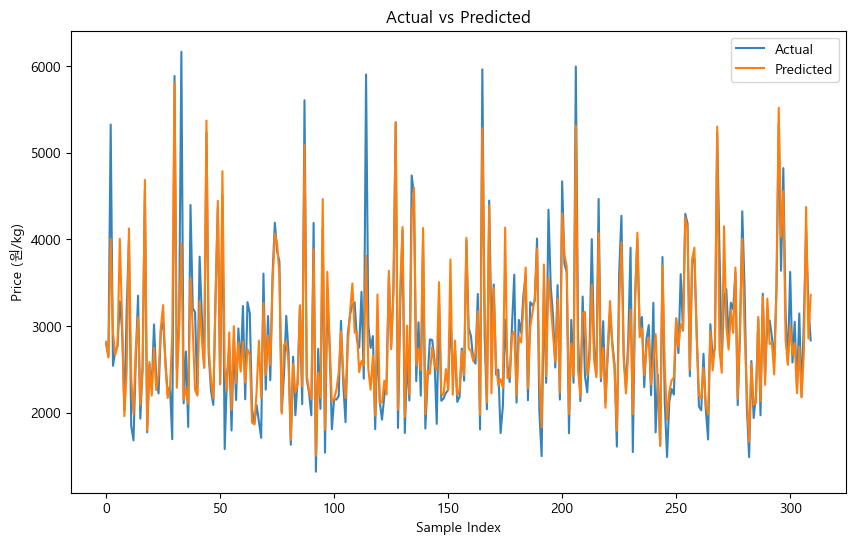

사과_거래량(kg): 0.06090140342712402
year: 0.410009503364563
month: 0.2610855996608734
day: 0.04494103044271469
resid: 0.02422945760190487
요일_금요일: 0.03651457652449608
요일_목요일: 0.00544936815276742
요일_수요일: 0.01288537122309208
요일_월요일: 0.014896361157298088
요일_일요일: 0.07172977179288864
요일_토요일: 0.033125076442956924
요일_화요일: 0.02423253282904625


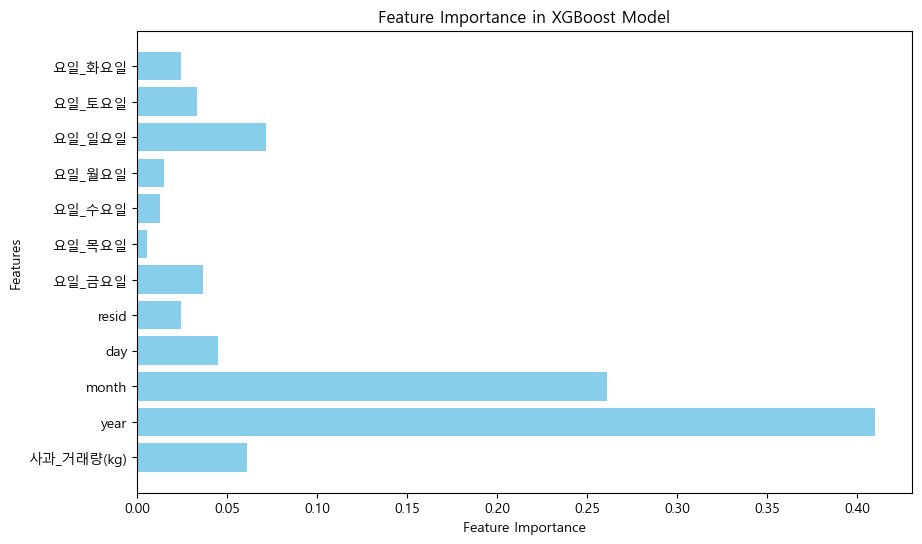

In [8]:
import matplotlib.pyplot as plt

feature_importances = model.feature_importances_
features = X.columns

# 결과시각화
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, alpha=0.9,  label="Actual", color='#1f77b4')
plt.plot(y_test_pred, label="Predicted", color='#ff7f0e'  )

plt.title("Actual vs Predicted")
plt.xlabel("Sample Index")
plt.ylabel("Price (원/kg)")
plt.legend()
plt.show()

# 특성 중요도 출력
for feature, importance in zip(features, feature_importances):
    print(f"{feature}: {importance}")

# 특성 중요도 시각화
plt.figure(figsize=(10, 6))
plt.barh(features, feature_importances, color='skyblue')
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Feature Importance in XGBoost Model")
plt.show()
